In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
from os.path import join as oj
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
sys.path.append('../src')
import numpy as np
import data_pecarn, data_psrc
from validate import calc_stats
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import itertools

df = pd.read_csv('../data/tbi/TBI PUD 10-08-2013.csv')

In [ ]:
groups = ['Gender', 'Ethnicity', 'Race']
vals = ['ActNorm', 'AMSAgitated', 'Drugs', 'IndRqstMD', 'CTSedAge', 'Observed']
# list(sorted(df.columns))
df = df.fillna('Missing')

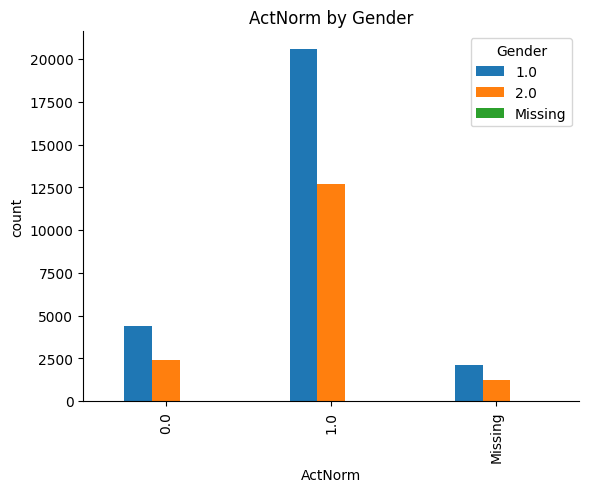

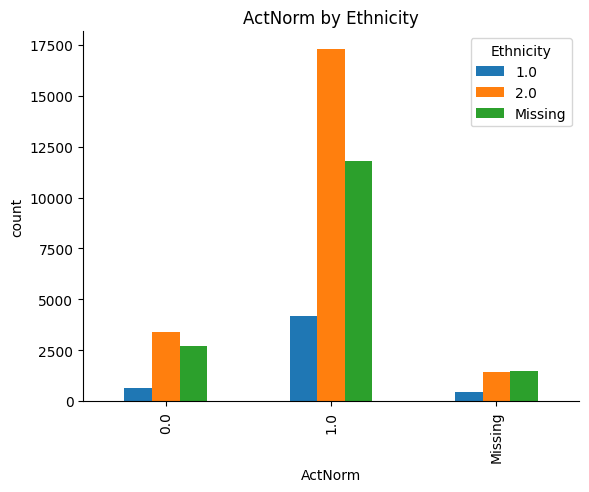

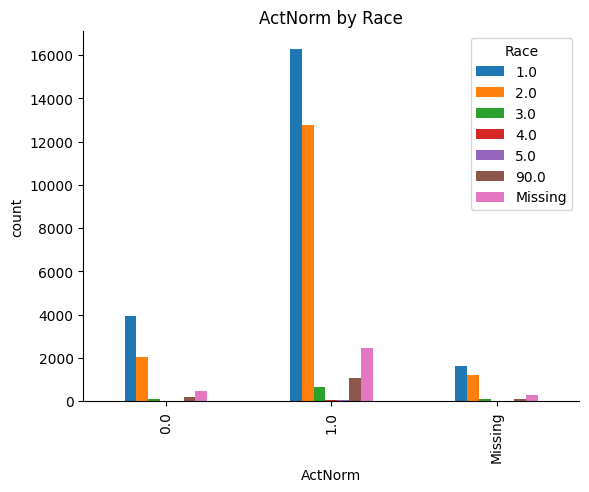

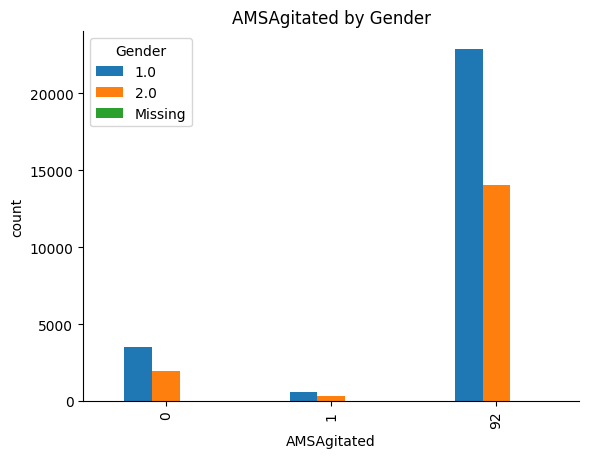

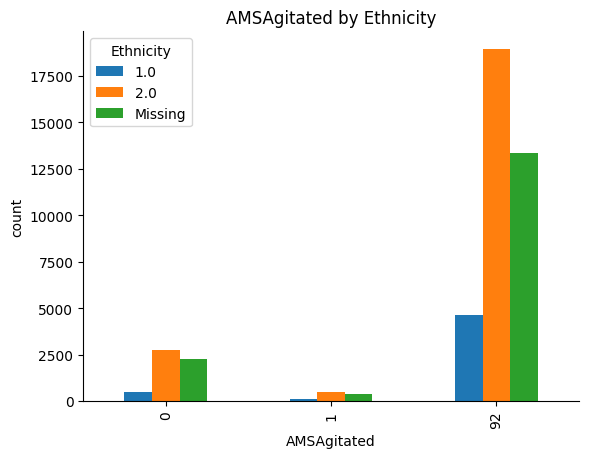

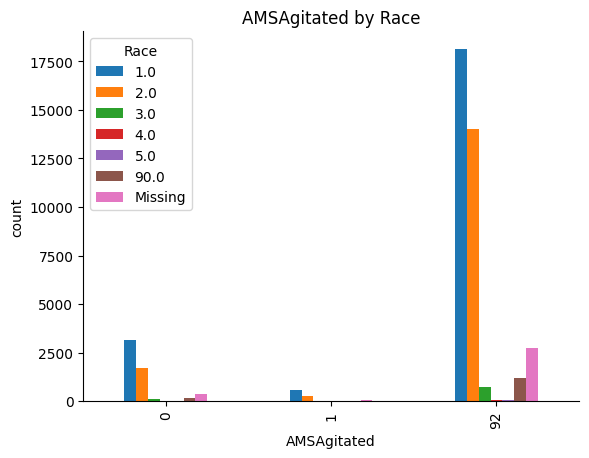

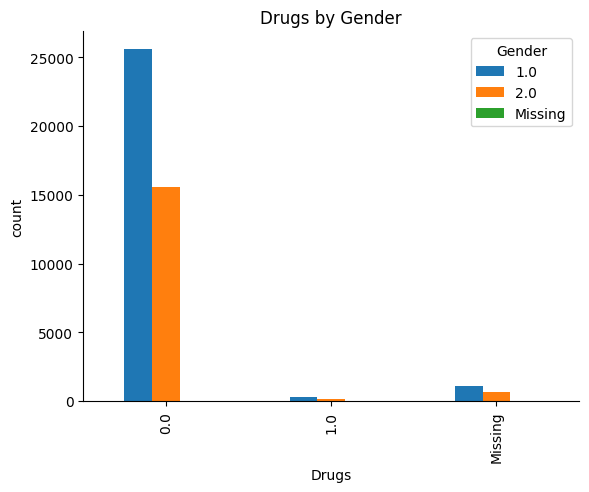

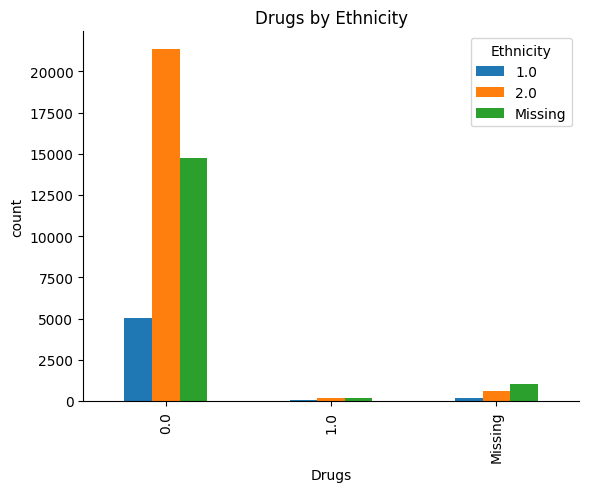

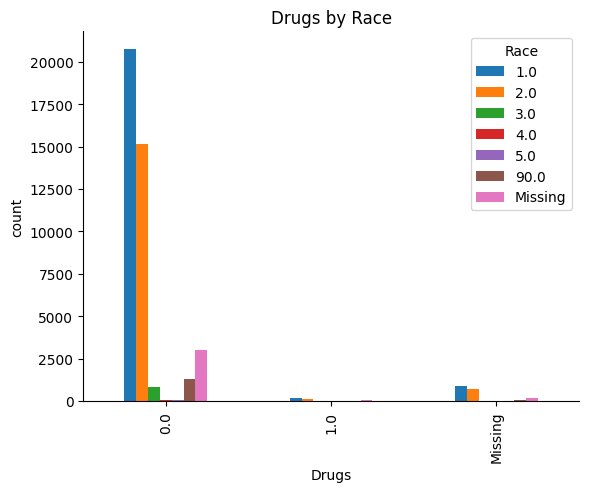

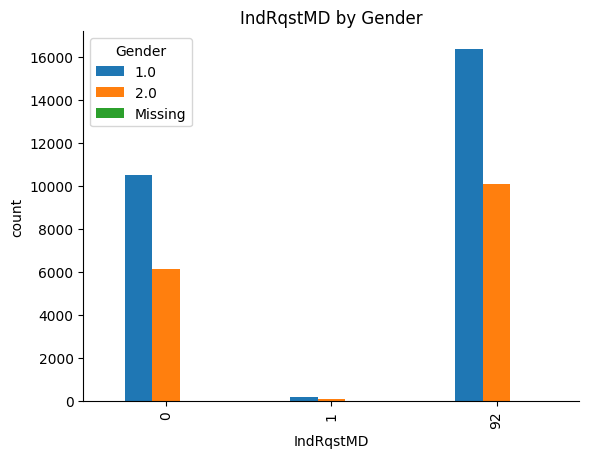

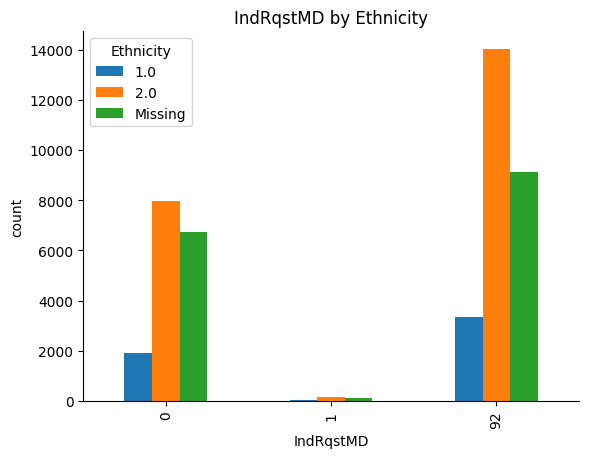

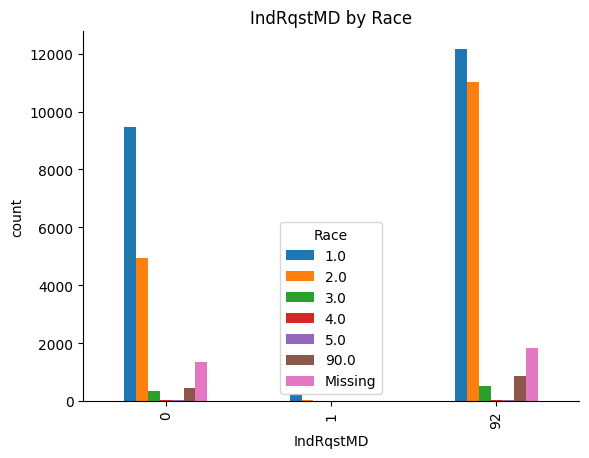

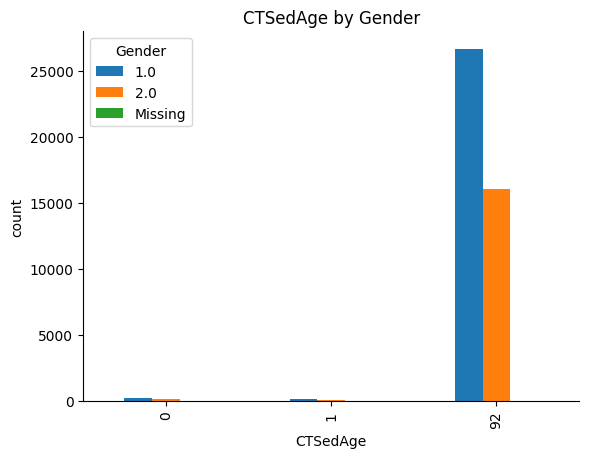

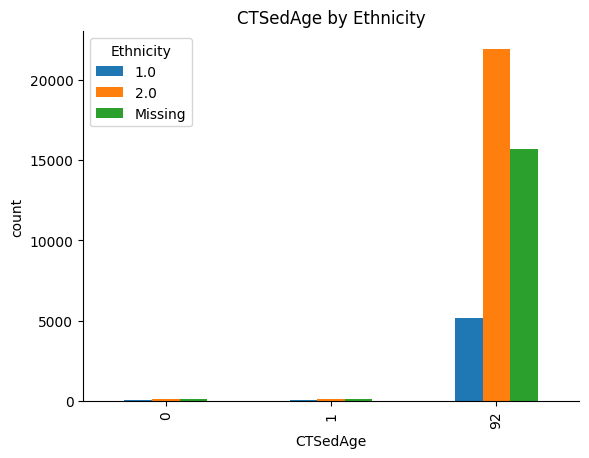

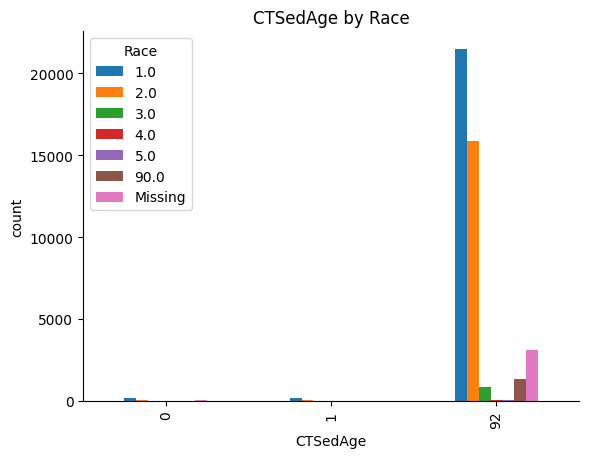

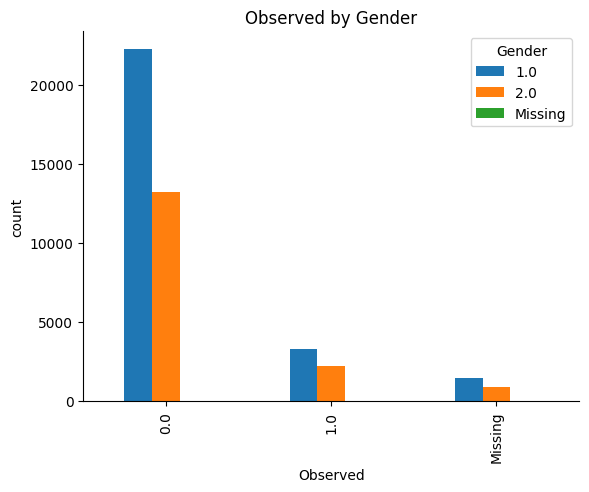

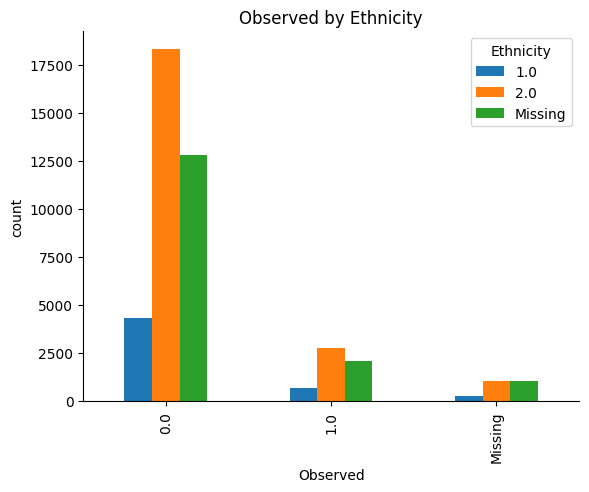

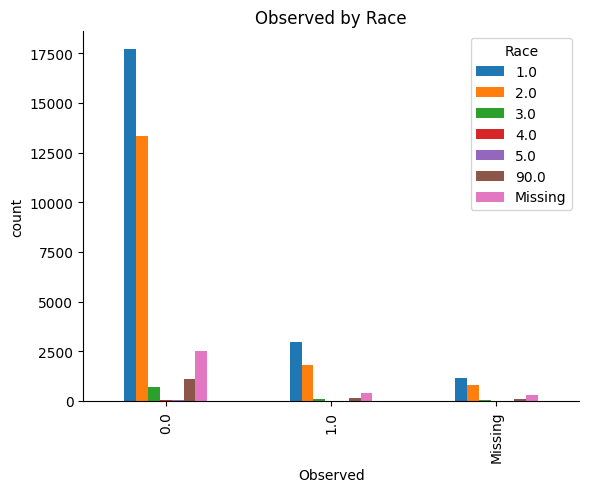

In [11]:
# plt.figure(figsize=(8, 4))
R = len(groups)
C = len(vals)
i = 0
for val in vals:
    # plot barplot of unique values for each group
    for group in groups:
        # plt.subplot(R, C, i + 1)
        df.groupby(group)[val].value_counts().unstack(0).plot.bar()
        plt.title(val + ' by ' + group)
        plt.xlabel(val)
        plt.ylabel('count')
        # plt.show()
        i += 1
# plt.show()